In [2]:
import scvelo as scv
import numpy as np
import loompy
import scipy
import anndata
scv.__version__
import os
import scanpy as sc
import matplotlib.pyplot as plt
import scvelo as scv
import scanpy as sc
import cellrank as cr
import os
import numpy  as np
import scanpy as sc
import pandas as pd
import time
import numpy as np

In [3]:
human_gast_raw = sc.read_csv('/Users/gabriele.lubatti/Desktop/Phd/entropy_of_mixing_library/elmir_data/raw_elmir_blood.csv', delimiter=',')


human_gast_raw = human_gast_raw.transpose()

In [4]:
with open('/Users/gabriele.lubatti/Desktop/Phd/entropy_of_mixing_library/elmir_data/cluster_blood.txt','r') as fdata:
    datastr=fdata.read()
    lst = datastr.split('"\n"')
    
cluster_blood=np.array(lst,dtype=str)

In [5]:
cluster_blood[0]='MEP1'
cluster_blood[-1]='Erythroblasts'
human_gast_raw.obs['cluster_blood']=cluster_blood

In [6]:
with open('/Users/gabriele.lubatti/Desktop/Phd/entropy_of_mixing_library/elmir_data/color_blood.txt','r') as fdata:
    datastr=fdata.read()
    lst = datastr.split('"\n"')
    
color_blood=np.array(lst,dtype=str)

In [7]:
color_blood[-1]='#B79F00'

In [8]:
color_blood[0]='#619CFF'

In [9]:
adata=human_gast_raw

In [10]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=2000)
sc.tl.pca(adata, n_comps=30)
sc.pp.neighbors(adata, n_neighbors=5, use_rep='X_pca')

In [15]:
sc.tl.paga(adata,groups="cluster_blood")



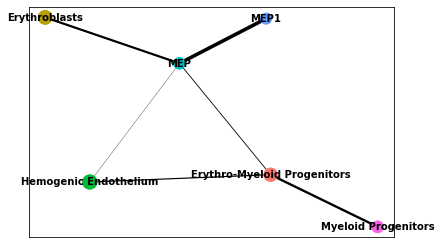

In [16]:
adata.uns['cluster_blood_colors']=["#F8766D","#B79F00","#00BA38","#00BFC4","#619CFF","#F564E3"]
sc.pl.paga(adata,save="gastrula_blood.pdf",edge_width_scale=0.7)